In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

In [2]:
import IPython.core.magic as ipym

@ipym.magics_class
class CppMagic(ipym.Magics):
    """Register cell and line magic to deal with C++ code"""
    def __init__(self, shell=None,  **kwargs):
        """Constructor.  Here we simply set up an argument parser"""
        super(CppMagic, self).__init__(shell=shell, **kwargs)
        
        from argparse import ArgumentParser, REMAINDER
        
        self._parser = ArgumentParser('C++ magic line parser')
        self._parser.add_argument('filename',
                                  help='Filename to store in')
        self._parser.add_argument('-m','--mode',choices=['return','print','eval'],
                                  default='return',
                                  help='What to do with the output of the program')
        self._parser.add_argument('args',nargs=REMAINDER)
        
    def _compile(self, filename):
        """Compile a file into code
        
        Parameters
        ----------
            filename : string 
                the file to compile 
                
        Throws
        ------
        e : CalledProcessError 
            In case of trouble compling file 
        """
        from subprocess import run 
        
        run(["g++", "-O3", filename, "-o", filename + ".out"], 
            check=True,capture_output=True)

    def _run(self, filename,*args):
        """Run a previously compiled program 
        
        Parameters
        ----------
            filename : str 
                Base name of file to execute
            args : other 
                Aditional arguments for program
                
        Returns
        -------
        output : str 
            Output of command 
            
        Raise
        -----
        
        e : CalledProcessError 
            In case of trouble executing code  
        """
        from subprocess import run 
        
        cmd = ["./" + filename + ".out",*args]
        ret = run(cmd, check=True, capture_output=True)
        
        output = ret.stdout.decode('utf8')
        return output
    
    def _write(self,filename,cell):
        """Write a file 
        
        Parameters
        ------------
        - filename : str 
                file to write to 
        
        """
        with open(filename,'w') as file:
            file.write(cell)
       
    @ipym.cell_magic
    def cppfile(self,line,cell):
        """Write named file to disk 
        
        Parameters
        -----------
            line : str Magic line 
            cell : Cell content
            """
        filename = line.strip()
        if filename == '':
            print('No filename passed to %%cppfile magic')
            return None
        
        self._write(filename, cell)
        
    @ipym.cell_magic
    def cpp(self, line, cell):
        """Write, compile. and execute code 
        
        Parameters 
        -----------
            line : %magic line 
            cell : Content
        """
        from sys import stderr
        from subprocess import CalledProcessError
        
        try:
            args = self._parser.parse_args(line.split())
        except SystemExit as e:
            self._parser.print_help()
            return

        self._write(args.filename, cell)
        
        try:
            self._compile(args.filename)
            output = self._run(args.filename,*args.args)
            
            if args.mode in ['print', 'eval']:
                print(output)
                
                if args.mode == 'eval':
                    get_ipython().ex(output)
                
                output = None
                
        except CalledProcessError as e:
            if e.stderr is not None:
                print(e.stderr.decode('utf8'),file=stderr)
            else:
                print(e.stdout.decode("utf8"))
            output = None
                   
        return output
    
## use ipython load_ext mechanisme here if distributed
get_ipython().register_magics(CppMagic)
    
def CppStyle():
    from IPython.display import HTML
    code =  """
        <script>
        /* require(['notebook/js/codecell'], function(codecell) {
            console.log('Register %%cpp magic with CodeMirror')
             codecell.CodeCell.options_default.highlight_modes['magic_text/x-c++'] = 
                 {'reg':[/^%%cpp/,/^%%cppfile/]} ;
             Jupyter.notebook.events.one('kernel_ready.Kernel', function(){
                 Jupyter.notebook.get_cells().map(function(cell){
                     if (cell.cell_type == 'code'){ cell.auto_highlight(); } }) ;
            });
        }); */
        IPython.CodeCell.options_default.highlight_modes['magic_text/x-c++src'] = 
            {'reg':['^%%cpp','^%%cppfile']} ;
        IPython.notebook.events.one('kernel_ready.Kernel', function(){
            IPython.notebook.get_cells().map(function(cell){
                if (cell.cell_type == 'code'){ cell.auto_highlight(); } }) ;
        });
        </script>"""
    return HTML(hide_toggle_code()+code)

CppStyle()

### Christian Holm Christensen <a class='tocSkip'></a>

# Prime numbers <a class='tocSkip'></a>
## Using Eratosthenes Sieve <a class='tocSkip'></a>
## Version 0.2 - September 2019 (English)<a class='tocSkip'></a>

> We will use the Sieve of Eratosthenes algorithm to find prime numbers in some range from 1 to $N$. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

## The algorithm 

The algorithm is as follows:

1. Make a table of for every number between 1 and $N$. 
2. Starting at 2, cross out all multiples of 2, except 2 itself. 
3. Move to the next number that hasn't been crossed out 
4. Repeat the two steps above up to $\sqrt{N}$. 

Below we will implement this algorithm.  However, we notice that for a given $i\in[1,N]$ we need only cross out 

$$ i(i + j)\qquad i = 0,1,2,\ldots\quad,$$

thus sawing some operations. 

## Implementation in Python

### Plain Python 

First, we will make our implementation in plain Python. 

In [3]:
def sieve(n : int) -> list:
    from math import sqrt 
    
    check = [True]*(n+1)
    check[0:2] = [False]*2
    for i in range(2,int(sqrt(n))+1):
        if not check[i]: continue
        check[i*i:n+1:i] = [False]*(n//i-i+1)
    return [i for i in range(n+1) if check[i]]

We use this function to find the primes up to and including 100

In [4]:
sieve(100)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

### Using _NumPy_

We will use _NumPy_ to make some of the calculations a bit easier 

In [5]:
import numpy as np

In [6]:
def npsieve(n: int) -> list:
    """Sieve away only primes"""
    check      = np.ones(n+1,dtype=bool)
    check[0:2] = False;
    for i in np.arange(2,int(np.sqrt(n))+1,dtype=int):
        if not check[i]: continue
        check[i*i:n+1:i] = False

    return np.arange(n+1)[check]

Note, we actually never define the table of numbers.  Instead, we define an array of boolean values (`True` or `False`).  
- Then, we loop over the index $i\in\left[2,\lfloor\sqrt{N}\rfloor+1\right]$.
  - If the current number $i$ has been marked as _not_ a prime, then it has a smaller divisor and all multiples of this number has therefore also been marked as _not_ prime 
  - Next, we mark all numbers 
  
    $$ i(i+j)\quad j=0,1,2,\ldots\quad,$$ 
    
    as _not_ prime. 
- In the end, we use our _mask_ `check` to filter out values in the range $[0,N]$ that _are_ prime.     

Let us list the primes between 1 and 100:

In [7]:
npsieve(100)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

## Validation of results 

We can be a bit more thorough and check against a list of know primes.  We make a function which compares to a list of known primes and we compare up to the number passed in.  Internally we call our `sieve` implementation.  

In [8]:
known = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41,
                      43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97,
                      101, 103, 107, 109, 113, 127, 131, 137, 139,
                      149, 151, 157, 163, 167, 173, 179, 181, 191,
                      193, 197, 199, 211, 223, 227, 229, 233, 239,
                      241, 251, 257, 263, 269, 271, 277, 281, 283,
                      293, 307, 311, 313, 317, 331, 337, 347, 349,
                      353, 359, 367, 373, 379, 383, 389, 397, 401,
                      409, 419, 421, 431, 433, 439, 443, 449, 457,
                      461, 463, 467, 479, 487, 491, 499, 503, 509,
                      521, 523, 541, 547, 557, 563, 569, 571, 577,
                      587, 593, 599, 601, 607, 613, 617, 619, 631,
                      641, 643, 647, 653, 659, 661, 673, 677, 683,
                      691, 701, 709, 719, 727, 733, 739, 743, 751,
                      757, 761, 769, 773, 787, 797, 809, 811, 821,
                      823, 827, 829, 839, 853, 857, 859, 863, 877,
                      881, 883, 887, 907, 911, 919, 929, 937, 941,
                      947, 953, 967, 971, 977, 983, 991, 997, 1009,
                      1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051,
                      1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103,
                      1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171,
                      1181, 1187, 1193, 1201, 1213, 1217, 1223, 1229,
                      1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289,
                      1291, 1297, 1301, 1303, 1307, 1319, 1321, 1327,
                      1361, 1367, 1373, 1381, 1399, 1409, 1423, 1427,
                      1429, 1433, 1439, 1447, 1451, 1453, 1459, 1471,
                      1481, 1483, 1487, 1489, 1493, 1499, 1511, 1523,
                      1531, 1543, 1549, 1553, 1559, 1567, 1571, 1579,
                      1583, 1597, 1601, 1607, 1609, 1613, 1619, 1621,
                      1627, 1637, 1657, 1663, 1667, 1669, 1693, 1697,
                      1699, 1709, 1721, 1723, 1733, 1741, 1747, 1753,
                      1759, 1777, 1783, 1787, 1789, 1801, 1811, 1823,
                      1831, 1847, 1861, 1867, 1871, 1873, 1877, 1879,
                      1889, 1901, 1907, 1913, 1931, 1933, 1949, 1951,
                      1973, 1979, 1987, 1993, 1997, 1999, 2003, 2011,
                      2017, 2027, 2029, 2039, 2053, 2063, 2069, 2081,
                      2083, 2087, 2089, 2099, 2111, 2113, 2129, 2131,
                      2137, 2141, 2143, 2153, 2161, 2179, 2203, 2207,
                      2213, 2221, 2237, 2239, 2243, 2251, 2267, 2269,
                      2273, 2281, 2287, 2293, 2297, 2309, 2311, 2333,
                      2339, 2341, 2347, 2351, 2357, 2371, 2377, 2381,
                      2383, 2389, 2393, 2399, 2411, 2417, 2423, 2437,
                      2441, 2447, 2459, 2467, 2473, 2477, 2503, 2521,
                      2531, 2539, 2543, 2549, 2551, 2557, 2579, 2591,
                      2593, 2609, 2617, 2621, 2633, 2647, 2657, 2659,
                      2663, 2671, 2677, 2683, 2687, 2689, 2693, 2699,
                      2707, 2711, 2713, 2719, 2729, 2731, 2741, 2749,
                      2753, 2767, 2777, 2789, 2791, 2797, 2801, 2803,
                      2819, 2833, 2837, 2843, 2851, 2857, 2861, 2879,
                      2887, 2897, 2903, 2909, 2917, 2927, 2939, 2953,
                      2957, 2963, 2969, 2971, 2999, 3001, 3011, 3019,
                      3023, 3037, 3041, 3049, 3061, 3067, 3079, 3083,
                      3089, 3109, 3119, 3121, 3137, 3163, 3167, 3169,
                      3181, 3187, 3191, 3203, 3209, 3217, 3221, 3229,
                      3251, 3253, 3257, 3259, 3271, 3299, 3301, 3307,
                      3313, 3319, 3323, 3329, 3331, 3343, 3347, 3359,
                      3361, 3371, 3373, 3389, 3391, 3407, 3413, 3433,
                      3449, 3457, 3461, 3463, 3467, 3469, 3491, 3499,
                      3511, 3517, 3527, 3529, 3533, 3539, 3541, 3547,
                      3557, 3559, 3571, 3581, 3583, 3593, 3607, 3613,
                      3617, 3623, 3631, 3637, 3643, 3659, 3671, 3673,
                      3677, 3691, 3697, 3701, 3709, 3719, 3727, 3733,
                      3739, 3761, 3767, 3769, 3779, 3793, 3797, 3803,
                      3821, 3823, 3833, 3847, 3851, 3853, 3863, 3877,
                      3881, 3889, 3907, 3911, 3917, 3919, 3923, 3929,
                      3931, 3943, 3947, 3967, 3989, 4001, 4003, 4007,
                      4013, 4019, 4021, 4027, 4049, 4051, 4057, 4073,
                      4079, 4091, 4093, 4099, 4111, 4127, 4129, 4133,
                      4139, 4153, 4157, 4159, 4177, 4201, 4211, 4217,
                      4219, 4229, 4231, 4241, 4243, 4253, 4259, 4261,
                      4271, 4273, 4283, 4289, 4297, 4327, 4337, 4339,
                      4349, 4357, 4363, 4373, 4391, 4397, 4409, 4421,
                      4423, 4441, 4447, 4451, 4457, 4463, 4481, 4483,
                      4493, 4507, 4513, 4517, 4519, 4523, 4547, 4549,
                      4561, 4567, 4583, 4591, 4597, 4603, 4621, 4637,
                      4639, 4643, 4649, 4651, 4657, 4663, 4673, 4679,
                      4691, 4703, 4721, 4723, 4729, 4733, 4751, 4759,
                      4783, 4787, 4789, 4793, 4799, 4801, 4813, 4817,
                      4831, 4861, 4871, 4877, 4889, 4903, 4909, 4919,
                      4931, 4933, 4937, 4943, 4951, 4957, 4967, 4969,
                      4973, 4987, 4993, 4999, 5003, 5009, 5011, 5021,
                      5023, 5039, 5051, 5059, 5077, 5081, 5087, 5099,
                      5101, 5107, 5113, 5119, 5147, 5153, 5167, 5171,
                      5179, 5189, 5197, 5209, 5227, 5231, 5233, 5237,
                      5261, 5273, 5279, 5281, 5297, 5303, 5309, 5323,
                      5333, 5347, 5351, 5381, 5387, 5393, 5399, 5407,
                      5413, 5417, 5419, 5431, 5437, 5441, 5443, 5449,
                      5471, 5477, 5479, 5483, 5501, 5503, 5507, 5519,
                      5521, 5527, 5531, 5557, 5563, 5569, 5573, 5581,
                      5591, 5623, 5639, 5641, 5647, 5651, 5653, 5657,
                      5659, 5669, 5683, 5689, 5693, 5701, 5711, 5717,
                      5737, 5741, 5743, 5749, 5779, 5783, 5791, 5801,
                      5807, 5813, 5821, 5827, 5839, 5843, 5849, 5851,
                      5857, 5861, 5867, 5869, 5879, 5881, 5897, 5903,
                      5923, 5927, 5939, 5953, 5981, 5987, 6007, 6011,
                      6029, 6037, 6043, 6047, 6053, 6067, 6073, 6079,
                      6089, 6091, 6101, 6113, 6121, 6131, 6133, 6143,
                      6151, 6163, 6173, 6197, 6199, 6203, 6211, 6217,
                      6221, 6229, 6247, 6257, 6263, 6269, 6271, 6277,
                      6287, 6299, 6301, 6311, 6317, 6323, 6329, 6337,
                      6343, 6353, 6359, 6361, 6367, 6373, 6379, 6389,
                      6397, 6421, 6427, 6449, 6451, 6469, 6473, 6481,
                      6491, 6521, 6529, 6547, 6551, 6553, 6563, 6569,
                      6571, 6577, 6581, 6599, 6607, 6619, 6637, 6653,
                      6659, 6661, 6673, 6679, 6689, 6691, 6701, 6703,
                      6709, 6719, 6733, 6737, 6761, 6763, 6779, 6781,
                      6791, 6793, 6803, 6823, 6827, 6829, 6833, 6841,
                      6857, 6863, 6869, 6871, 6883, 6899, 6907, 6911,
                      6917, 6947, 6949, 6959, 6961, 6967, 6971, 6977,
                      6983, 6991, 6997, 7001, 7013, 7019, 7027, 7039,
                      7043, 7057, 7069, 7079, 7103, 7109, 7121, 7127,
                      7129, 7151, 7159, 7177, 7187, 7193, 7207, 7211,
                      7213, 7219, 7229, 7237, 7243, 7247, 7253, 7283,
                      7297, 7307, 7309, 7321, 7331, 7333, 7349, 7351,
                      7369, 7393, 7411, 7417, 7433, 7451, 7457, 7459,
                      7477, 7481, 7487, 7489, 7499, 7507, 7517, 7523,
                      7529, 7537, 7541, 7547, 7549, 7559, 7561, 7573,
                      7577, 7583, 7589, 7591, 7603, 7607, 7621, 7639,
                      7643, 7649, 7669, 7673, 7681, 7687, 7691, 7699,
                      7703, 7717, 7723, 7727, 7741, 7753, 7757, 7759,
                      7789, 7793, 7817, 7823, 7829, 7841, 7853, 7867,
                      7873, 7877, 7879, 7883, 7901, 7907, 7919, 7927,
                      7933, 7937, 7949, 7951, 7963, 7993, 8009, 8011,
                      8017, 8039, 8053, 8059, 8069, 8081, 8087, 8089,
                      8093, 8101, 8111, 8117, 8123, 8147, 8161, 8167,
                      8171, 8179, 8191, 8209, 8219, 8221, 8231, 8233,
                      8237, 8243, 8263, 8269, 8273, 8287, 8291, 8293,
                      8297, 8311, 8317, 8329, 8353, 8363, 8369, 8377,
                      8387, 8389, 8419, 8423, 8429, 8431, 8443, 8447,
                      8461, 8467, 8501, 8513, 8521, 8527, 8537, 8539,
                      8543, 8563, 8573, 8581, 8597, 8599, 8609, 8623,
                      8627, 8629, 8641, 8647, 8663, 8669, 8677, 8681,
                      8689, 8693, 8699, 8707, 8713, 8719, 8731, 8737,
                      8741, 8747, 8753, 8761, 8779, 8783, 8803, 8807,
                      8819, 8821, 8831, 8837, 8839, 8849, 8861, 8863,
                      8867, 8887, 8893, 8923, 8929, 8933, 8941, 8951,
                      8963, 8969, 8971, 8999, 9001, 9007, 9011, 9013,
                      9029, 9041, 9043, 9049, 9059, 9067, 9091, 9103,
                      9109, 9127, 9133, 9137, 9151, 9157, 9161, 9173,
                      9181, 9187, 9199, 9203, 9209, 9221, 9227, 9239,
                      9241, 9257, 9277, 9281, 9283, 9293, 9311, 9319,
                      9323, 9337, 9341, 9343, 9349, 9371, 9377, 9391,
                      9397, 9403, 9413, 9419, 9421, 9431, 9433, 9437,
                      9439, 9461, 9463, 9467, 9473, 9479, 9491, 9497,
                      9511, 9521, 9533, 9539, 9547, 9551, 9587, 9601,
                      9613, 9619, 9623, 9629, 9631, 9643, 9649, 9661,
                      9677, 9679, 9689, 9697, 9719, 9721, 9733, 9739,
                      9743, 9749, 9767, 9769, 9781, 9787, 9791, 9803,
                      9811, 9817, 9829, 9833, 9839, 9851, 9857, 9859,
                      9871, 9883, 9887, 9901, 9907, 9923, 9929, 9931,
                      9941, 9949, 9967, 9973])
print(known)
hide_toggle()

[   2    3    5 ... 9949 9967 9973]


In [9]:
def check(n,f=npsieve,known=known):
    nn = np.array([10000, 5000, 1000, 500, 100, 50, 10]) 
    ll = np.array([ 1229,  669,  168,  95,  25, 15,  4])
    
    primes = f(n)
    l      = np.argwhere(nn <= n)[0,0]
    mm = ll[l]
    
    print('Comparing the first {}/{}'.format(mm,nn[l]))
    assert np.all(primes[:mm] == known[:mm]), 'Failed!'

Let us run the check for some values of $N$

In [10]:
for n in [10,100,500,1000,5000,10000]:
    check(n,sieve), check(n,npsieve)

Comparing the first 4/10
Comparing the first 4/10
Comparing the first 25/100
Comparing the first 25/100
Comparing the first 95/500
Comparing the first 95/500
Comparing the first 168/1000
Comparing the first 168/1000
Comparing the first 669/5000
Comparing the first 669/5000
Comparing the first 1229/10000
Comparing the first 1229/10000


In [11]:
%%timeit 
npsieve(100000)

801 µs ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Timing (complexity) of the implementation 

Next, we want to find out the behavior of the algorithm and how many primes we have.   We define a small function for that 

In [12]:
import timeit
def run(n,f):
    l = [0]
    
    def trampoline():
        l[0] = len(f(n))
    
    m = 100
    t = timeit.repeat(trampoline,repeat=5,number=m)
    
    return n, l[0], min(t)/m

We run the timing for a number of $N$'s 

In [13]:
nltnp = np.array([run(n,npsieve) for n in [10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000]])
nltpy = np.array([run(n,sieve)   for n in [10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000]])

We now plot the average time and number of prime numbers for each $N$.  since we will repeat this plot later on, or parts of it, we define two functions to do it for us. 

In [14]:
# %matplotlib notebook
import matplotlib.pyplot as plt 
plt.rc("figure",figsize=(8,4))
plt.rc('font',size=15)

def pltNum(ax,dsl):
    for d, s, l in dsl:
        ax.plot(d[:,0],d[:,1],s,color='tab:blue',label=l)
    ax.set_xlabel(r'$N$')
    ax.set_ylabel('Number of primes',color='tab:blue')
    ax.set_xscale('log')
    ax.legend(loc='upper center')
    
def pltTim(ax,dsl):
    for d, s, l in dsl:
        ax.plot(d[:,0],d[:,2],s,color='tab:orange',label=l)
    ax.set_xlabel(r'$N$')
    ax.set_ylabel('Time spend (ms)',color='tab:orange')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='upper left')    

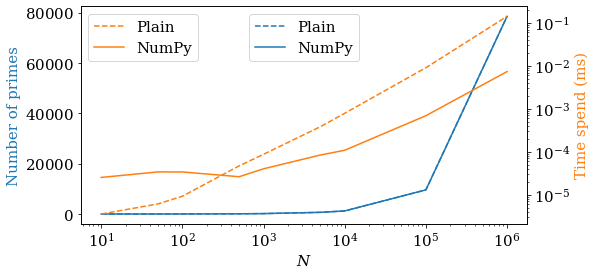

In [15]:
fig, ax = plt.subplots(ncols=1,nrows=1)
pltNum(ax,        [(nltpy,'--','Plain'), (nltnp,'-','NumPy')])
pltTim(ax.twinx(),[(nltpy,'--','Plain'), (nltnp,'-','NumPy')])

## Implementation in C++

The same algorithm in C++ would read 

In [16]:
%%cppfile Eratosthenes.hh
#include <valarray>
#include <numeric>

using int_array=std::valarray<unsigned int>;
using bool_array=std::valarray<bool>;

int_array sieve(size_t n)
{
  bool_array check(true,n+1);
  check[std::slice(0,2,1)] = false;
  for (size_t i = 2; i < size_t(sqrt(n))+1; i++) {
    if (!check[i]) continue;
    check[std::slice(i*i, (n+1)/i-i+1, i)] = false;
  }

  int_array ret(n+1);
  std::iota(std::begin(ret),std::end(ret), 0);
  return ret[check];
}

Disregarding the boiler-plate code (`#include` and so on), these 9 lines of code are very similar to the 7 lines of Python code above.  The main difference lies in that _NumPy_'s single call `np.arange` is replaced by two calls. 

A subtle difference lies in how we calculate slices in _NumPy_ and C++.  In _NumPy_ a slice is specified as 

$$\langle\textit{offset}\rangle:\langle\textit{end}\rangle:\langle\textit{step-size}\rangle\quad,$$ 

while in C++ we give 

$$\texttt{std::slice(}\langle\textit{offset}\rangle,\langle\textit{n-steps}\rangle,\langle\textit{step-size}\rangle\texttt{)}\quad,$$

where $\langle\textit{n-steps}\rangle$ is the number of steps to take.  Thus, we must calculate this number as 

$$ \frac{N+1 - i^2}{i}+1 = \frac{N+1}{i} - i + 1\quad,$$

where the division truncates to an integer. 

We can test and time in a similar manner as above.  Below we reproduce the timing code and run it 

In [17]:
%%cppfile TimeEratosthenes.hh
#include <chrono>
#include <tuple>

template <typename T>
std::tuple<unsigned,double> timeit(T& f, unsigned n, size_t cnt)
{
  double   sum = 0;
  unsigned l   = 0;
  for (size_t i = 0; i < cnt; i++) {
    auto start = std::chrono::system_clock::now();
    auto ret   = f(n);
    auto end   = std::chrono::system_clock::now();
    std::chrono::duration<double> elapsed = end-start;
    sum        += elapsed.count();
    l          =  ret;
  }
  return std::make_tuple(l,sum/cnt);
}
template <typename T>
std::tuple<unsigned,unsigned,double> repeat(T& f, unsigned n, size_t cnt=100)
{
    double   t = 1e20;
    unsigned l = 0;
    for (size_t i = 0; i < 5; i++) {
        auto lt = timeit(f, n, cnt);
        t = std::min(t,std::get<1>(lt));
        l = std::get<0>(lt);
    }
    return std::make_tuple(n,l,t);
}

In [18]:
%%cpp -m eval TestEratosthenes.cc -100
#include <iostream>
#include "TimeEratosthenes.hh"
#include "Eratosthenes.hh"

size_t test(unsigned n)
{
    return sieve(n).size();
}

int
main(int argc, char** argv)
{
  int n = 100;
  if (argc > 1) n = std::stoi(argv[1]);

  if (n > 0) {
    auto ret = sieve(n);
    for (auto p : ret) std::cout << p << std::endl;
  }
  else {
    int_array nn = {10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000};
    std::cout << "nltpp = np.array([" << std::flush;
    for (auto m : nn) {
      auto t = repeat(test, m, -n);
      std::cout << "("
		<< std::get<0>(t) << ","
		<< std::get<1>(t) << ","
		<< std::get<2>(t) << "),"
		<< "\n                  ";
    }
    std::cout << "])" << std::endl;
  }
  return 0;
}

nltpp = np.array([(10,4,3.1339e-07),
                  (50,15,5.9266e-07),
                  (100,25,8.9547e-07),
                  (500,95,3.44379e-06),
                  (1000,168,7.94636e-06),
                  (5000,669,4.47293e-05),
                  (10000,1229,7.15592e-05),
                  (100000,9592,0.000737031),
                  (1000000,78498,0.00945639),
                  ])



Let us plot this next to the Python results. 

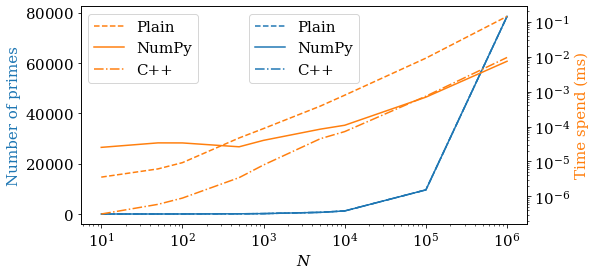

In [19]:
plt.figure()
ax = plt.gca()
pltNum(ax,        [(nltpy,'--','Plain'), (nltnp,'-','NumPy'),(nltpp,'-.','C++')])
pltTim(ax.twinx(),[(nltpy,'--','Plain'), (nltnp,'-','NumPy'),(nltpp,'-.','C++')])

To truly appreciate the difference in running time, let's plot the ratio of the time spend in Python to that spend in C++

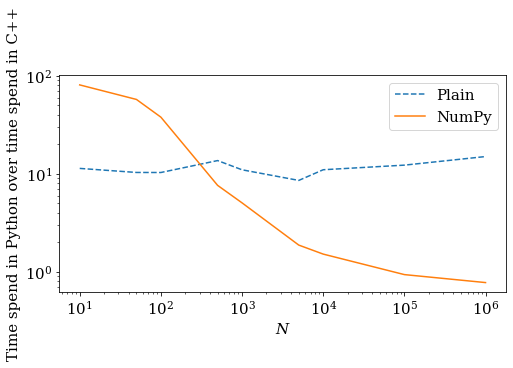

In [20]:
plt.figure()
plt.plot(nltpy[:,0],nltpy[:,2]/nltpp[:,2],'--',label='Plain')
plt.plot(nltnp[:,0],nltnp[:,2]/nltpp[:,2],'-', label='NumPy')
plt.xlabel(r'$N$')
plt.xscale('log')
plt.ylabel('Time spend in Python over time spend in C++')
plt.yscale('log')
plt.legend()

We see that in the limit of large $N$, the C++ and Python w/NumPy implementations approach similar speeds.  This clearly illustrates the utility of using _NumPy_'s compiled backend code.  Note, the large offset for $N<10\,000$ is due to additional set-up time needed by Python, which however is constant time as seen the previous plot. 

**Note** In an earlier version of this document, I had the timing of the C++ code wrong by a factor of 100, which caused a dramatic effect on this plot. 

## More fancy implementations 

Below we will see two implementations of the algorithms - one in Python and one in C++.  Both are implemented as _generators_ in the Python-parlance (_iterators_ in the C++ world).  What they have in common is that they do not calculate the next prime number until it is needed.  Furthermore, the algorithm is implemented such that we do not check for primeness until we hit the last _base_ primes square.  The _base_ primes are cached via a separate _supply_ (the same generator) and are pushed into a map when the current candidate is larger than the last base primes square.  If the candidate is not in the list of current base primes, we remove the first element of the map and find the next number such that it is in the map.  Then we set the step size to be the last step size.  

The algorithm then becomes 

For call/iteration number $i$ do 
- If $i=1$, return 2
- If $i=2$, return 3
- If $i=3$, return 5
- If $i=4$, do 
  - Create supply, and increment that twice
  - Save current base $p$ as the supplies value (which is 3)
  - Set the square of the current base $q=p^2$
  - Set the current candidate $n=q$
  - Set base prime map to be empty 
  - return 7
- Otherwise, do 
  - Loop until current candiate $n$ is _not_ in the map or current candidate _larger than_ current base squared. 
    - If current candidate $n>q$, then 
      - Map $q+2p$ to the offset $2p$.  That is, we add a new base prime $q+2p$, and associate the step size $2p$ to that.
      - Set the current base prime $p$ to the next number from the supply (5 the first time)
      - Set $q=p^2$.
    - Otherwise $n$ is a multiple of some element in the map 
      - Remove first element of map, and set $s$ to the associated step size 
      - Calculate possible next base prime as $m+s$ 
      - Until $m$ is _not_ in the map, increment $m$ by $s$ 
      - Associate $m$ with $s$ in the map.  That is, $m$ is an unmarked multiple of the prime 
    - Increment the current candidate $n$ by 2
  - Return candidate 
      
It takes some thinking to see how this work, but we are really just doing a delayed version of the above algorithm.  Let's see this in practise.  Note, we do not need _NumPy_ here, as we are not really operating on arrays. 

In [21]:
def primes():
    yield 2;
    yield 3;
    yield 5;
    yield 7;
    bps = (p for p in primes())             # separate supply of "base" primes (b.p.)
    p = next(bps) and next(bps)             # discard 2, then get 3
    q = p * p                               # 9 - square of next base prime to keep track of,
    sieve = {}                              #                       in the sieve dict
    n = 9                                   # n is the next candidate number
    while True:
        if n not in sieve:                  # n is not a multiple of any of base primes,
            if n < q:                       # below next base prime's square, so
                yield n                     # n is prime
            else:
                p2 = p + p                  # n == p * p: for prime p, add p * p + 2 * p
                sieve[q + p2] = p2          #   to the dict, with 2 * p as the increment step
                p = next(bps); q = p * p    # pull next base prime, and get its square
        else:
            s = sieve.pop(n); nxt = n + s   # n's a multiple of some b.p., find next multiple
            while nxt in sieve: nxt += s    # ensure each entry is unique
            sieve[nxt] = s                  # nxt is next non-marked multiple of this prime
        n += 2                              # work on odds only

To calculate the primes smaller than some number $N$, we define a small function that evaluates the `primes` generator until we reach a number larger than $N$.  Here, we make use of the powerful `itertools` module

In [22]:
import itertools
def primes_up_to(limit):
    return list(itertools.takewhile(lambda p: p <= limit, primes()))

Again, we can time this algorithm by doing 

In [23]:
import timeit
def run2(n,cnt=10):
    l = [0]
    def trampoline():
        l[0] = len(primes_up_to(n))

    t = timeit.timeit(trampoline,number=cnt)
    return n, l[0], t

This time around, we are not so concerned about the number of primes, so we will simply plot the timing of this algorithm and compare to what we got above. 

In [24]:
nlt2 = np.array([run2(n) for n in [10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000]])

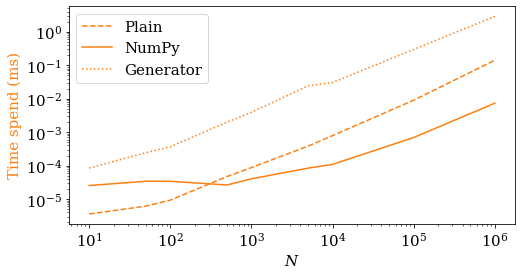

In [25]:
plt.figure()
pltTim(plt.gca(),[(nltpy,'--','Plain'), (nltnp,'-','NumPy'),(nlt2,':','Generator')])

A little surprisingly, we see the second implementation - the one that works as a generator - takes _longer_ than the simpler algorithm above, at least for large $N$. 

Let us look at the same, but done in C++.  First the code of the algorithm 

In [26]:
%%cppfile EratosthenesIterator.hh
#include <iterator>
#include <map>

/** 
 * Iterator to return prime numbers using Eratosthenes Sieve
 * algorithm.
 */
struct Eratosthenes : public std::iterator<std::input_iterator_tag,unsigned>
{
  using iterator_category = std::input_iterator_tag;
  using value_type = unsigned;
  using reference = value_type const&;
  using pointer = value_type const*;
  using difference_type = size_t;

  /** 
   * Constructor 
   */
  Eratosthenes()
    : _current(0),
      _currentSquared(0),
      _candidate(2),
      _value(2),
      _count(0),
      _map(),
      _supply(0)
  {}
  /** 
   * Copy constructor 
   */
  Eratosthenes(const Eratosthenes& o)
    : _current(o._current),
      _currentSquared(o._currentSquared),
      _candidate(o._candidate),
      _value(o._value),
      _count(o._count),
      _map(o._map),
      _supply(0)
  {
    if (o._supply) _supply = new Eratosthenes(*o._supply);
  }
  /** Destructor */
  ~Eratosthenes() { if (_supply) delete _supply; _supply = 0; }
  /** 
   * Conversion to bool.
   * @return Always true, meaning infinite iteration
   */
  explicit operator bool() const { return true; }
  /** 
   * Dereference operator.  
   * @return current number 
   */
  reference operator*() const { return _value; }
  /** 
   * Pointer dereference operator.  
   * @return pointer to current number 
   */
  pointer operator->() const { return &_value; }
  /** 
   * Pre-increment operator.  Calculates the next state.
   *
   * @return Reference to this object 
   */
  Eratosthenes& operator++()
  {
    _value = next();
    _count++;
    return *this;
  }
  /** 
   * Post-increment operator.  Calculates the next state.
   *
   * @return Reference to this object 
   */
  Eratosthenes operator++(int)
  {
    Eratosthenes const tmp(*this);
    ++*this;
    return tmp;
  }
  bool operator!=(const Eratosthenes& o)
  {
    return o._value != _value;
  }
  size_t count() const { return _count; }
protected:
  /** 
   * Implementation of algorithm 
   *
   * @return Next value 
   */
  unsigned next()
  {
    if (_candidate == 2) { _candidate++;   return 3; }
    if (_candidate == 3) { _candidate = 5; return 5; }
    if (_candidate == 5) {
      _supply         = new  Eratosthenes(); // Wish this wasn't needed
      _current        = *(++(*_supply));
      _currentSquared = _current * _current;
      _candidate      = _currentSquared;
      return 7;
    }
    // Check if current candidate is smaller than current base
    // squared.  If so, it is prime, and we skip the loop.  If the
    // current candidate is larger than the square base, or equal to
    // one element of the map, we enter the loop.
    for (; _candidate >= _currentSquared ||
           _map.find(_candidate) != _map.end(); _candidate += 2) {
      if (_candidate >= _currentSquared) {
        // candidate is _currentSquared, so add current*current +
        // 2*current to map with 2*current as increment
        unsigned p2                = _current + _current;
        _map[_currentSquared + p2] = p2;
        // Pull next base prime 
        _current                   = *(++(*_supply));
        _currentSquared            = _current * _current;
      }
      else {
        // _candidate multiple of some base prime
        auto     it     = _map.find(_candidate);
        unsigned step   = it->second;
        _map.erase(it);
        // Find next multiple 
        auto nxt = _candidate + step;      
        while (_map.find(nxt) != _map.end()) nxt += step;
        _map[nxt] = step;
      }
    }
    unsigned tmp = _candidate;
    _candidate += 2;
    return tmp;
  }
  /** Type of mapping from base prime to increments */
  using map=std::map<unsigned,unsigned>;
  /** Current base prime */
  unsigned       _current;
  /** Square of current base prime */
  unsigned       _currentSquared;
  /** Current candidate value */
  unsigned       _candidate;
  /** Current value */
  unsigned       _value;
  /** Current count */
  size_t         _count;
  /** Map of base primes to increments */
  map            _map;
  /** Base prime supply */
  Eratosthenes*  _supply;
};

The implementation is akin to the Python implementation.  For reference, we include the code to test the timing of this implementation and run it to get our timing results

In [27]:
%%cpp -m eval TestEratosthenesIterator.cc -10
#include "EratosthenesIterator.hh"
#include "TimeEratosthenes.hh"
#include <iostream>

size_t test(unsigned n)
{
    size_t cnt = 0;
    Eratosthenes e;
    for (; *e <= n; ++e) cnt++;
    return cnt;
}

int main(int argc, char** argv)
{
  int n = 100;
  if (argc > 1) n = std::stoi(argv[1]);

  if (n > 0) {
    for (Eratosthenes e; *e <= n; ++e) std::cout << *e << std::endl;
  }
  else {
    std::cout << "nltpp2 = np.array([" << std::flush;
    for (auto m : {10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000}) {
      auto r = repeat(test, m, -n);
      std::cout << "("
	   	        << std::get<0>(r) << ", "
		        << std::get<1>(r) << ", "
		        << std::get<2>(r) << "), "
		        << "\n                  ";
    }
    std::cout << "])" << std::endl;
  }
  return 0;
}

nltpp2 = np.array([(10, 4, 3.131e-07), 
                  (50, 15, 2.0255e-06), 
                  (100, 25, 4.8533e-06), 
                  (500, 95, 3.49739e-05), 
                  (1000, 168, 9.03669e-05), 
                  (5000, 669, 0.00058125), 
                  (10000, 1229, 0.00122274), 
                  (100000, 9592, 0.0176561), 
                  (1000000, 78498, 0.210072), 
                  ])



Let us plot these results and all the result above (on timing) to compare. 

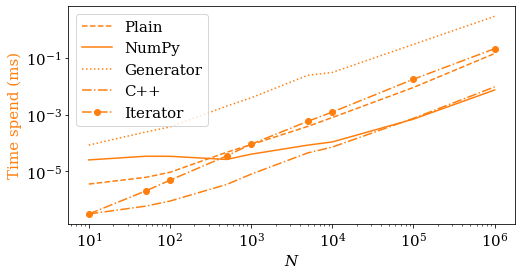

In [28]:
plt.figure()
pltTim(plt.gca(),[(nltpy,'--','Plain'), (nltnp,'-','NumPy'),(nlt2,':','Generator'),
                  (nltpp,'-.','C++'),   (nltpp2,'o-.','Iterator')])

Again, we see the _iterator_ approach to the algorithm implemented in C++ does _worse_ than our first implementation. However, it still beats the first Python implementation.  The relative slow-down for the first implementations at low $N$ is caused be the overhead of allocating initial arrays - something both of the later algorithms does not suffer from. 

The message is rather clear - we should not always trust that a clever algorithms does better than optimized code such as _NumPy_ arrays or C++ `std::valarray`. 